#### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score

##### Load Dataset

In [3]:
data=load_breast_cancer()

In [6]:
X=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.DataFrame(data.target)

In [7]:
X.shape

(569, 30)

In [8]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

##### Train-Test split

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

##### Standardize features

In [11]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

#### Fit Logistic Regression Model

In [12]:
model = LogisticRegression()

In [13]:
model.fit(X_train_scaled,y_train)

c:\Users\surya\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

###### Confusion Matrix

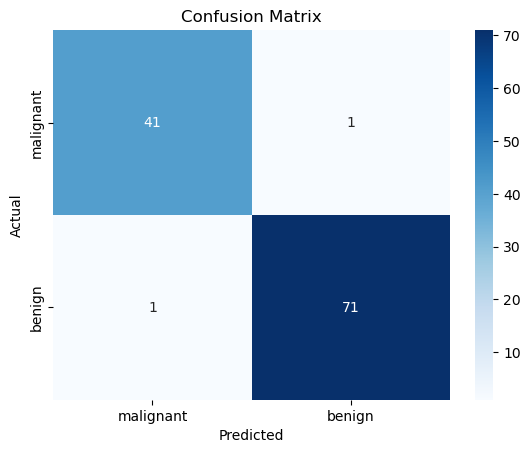

In [16]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
print(classification_report(y_test, y_pred, target_names=data.target_names))

              precision    recall  f1-score   support

   malignant       0.98      0.98      0.98        42
      benign       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [21]:
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Precision: 0.9861111111111112
Recall: 0.9861111111111112


In [22]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

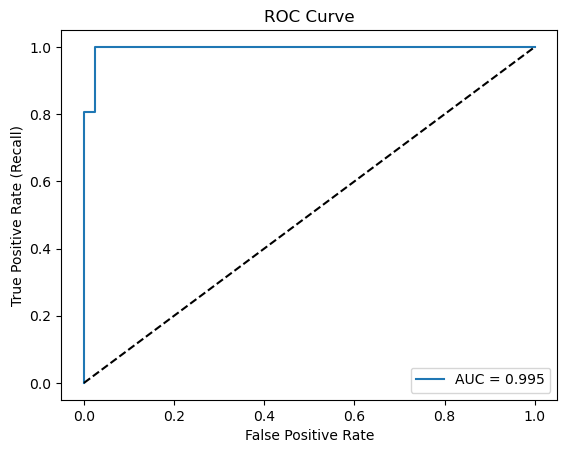

In [23]:
plt.plot(fpr, tpr, label="AUC = {:.3f}".format(auc))
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()

##### Threshold Tuning

In [24]:
threshold = 0.3
y_pred_threshold = (y_prob >= threshold).astype(int)

In [25]:

print("Confusion Matrix (Threshold=0.3):")
print(confusion_matrix(y_test, y_pred_threshold))
print("Precision:", precision_score(y_test, y_pred_threshold))
print("Recall:", recall_score(y_test, y_pred_threshold))

Confusion Matrix (Threshold=0.3):
[[40  2]
 [ 0 72]]
Precision: 0.972972972972973
Recall: 1.0
